# Phase 3 project - Predicting Covid Hospitalizations

Student name: Maria Kuzmin
<br>Student pace: Flex
<br>Scheduled project review date/time: Tuesday, Jan 17th 3PM
<br>Instructor name: Morgan Jones

## Introduction

During the Covid-19 pandemic, one of the major issues in the healthcare system was the shortage of medical resources and the lack of a system to distribute them according to the local hospitals and facilities’ needs.

In this project we analyzed a dataset with information about patients' health conditions and tried to predict whether the patient is at risk for needing to be hospitalized due to Covid-19 infection.
We focused only on the patients that tested positive for Covid-19. As the target, we studied whether or not the patient was admitted into the hospital or sent home to continue treatment independently.

Being able to predict such information could help to estimate the amount of people that will require hospitalization for the next pandemic. 
<br>This would assist authorities in procuring and arranging for the resources necessary to treat all the patients in need. 
Based on this model we were also able to look at the most crucial conditions that ultimately put a patient at risk of hospitalization and to help the healthcare system target those factors specifically.

## The Stakeholders: the CDC

Analyzing the medical conditions of patients in a certain area or county could help the CDC and hospitals predict the amount of patients they should expect to hospitalize, and therefore being prepared and properly equipped to treat them.
<br>Looking at the most determining factors for high-risk in patients, the CDC could also direct specific effort to treat and prevent such conditions, launching health campaigns and alerting healthcare providers about those conditions.

### The Goal:
The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current health condition and medical conditions, will predict whether the patient is at high-risk or not for needing to be hospitalized.
Investigating more in depth the best performing models, we will also analyze what are the factors that are most influetial in determining whether a patient is at risk or not.
<br>We do not know when the next pandemic will hit, and what will be the main risk factors for patients and what will be the supplies most needed from hospitals.
<br>With this model, simply by using some data from the first infected patients, we can quickly draw conclusions about the most relevant risk factors.
<br>This would allow the CDC and the health care system to analyze the first available data of the patients hospitalized during the first few months of the next pandemic (that would have been January and Februray 2020 for the last pandemic) to find out right away what are the main risk factors of the disease.
<br>This would give hospitals precious time to prepare in terms of supplies and personnel. Also, using the model on the demographics of the patients living near a hospital, it would be possible to find out how many patients to expect to intake due to a new disease.



## Roadmap:

- Dataset
- Data Preparation:
    - Selection of Target
    - Data Cleaning
    - Train Test Split
    - Scaling
- Logistic Regression Model
- Decision Tree Classifier
    - Including Class Imbalance
- Random Forest Classifier
    - Including Class Imbalance
- Model Tuning:
    - First GridSearchCV
    - Second GridSearchCV
    - Third GridSearchCV
    - Fourth GridSearchCV
- Gradient Boosting
- Results:
    - Best Models Performance
    - Features Importance
- Conclusion
- Recommendations
- Next Steps

### Imports

Let us import all the libraries and tools that we are going to need.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from colorama import Fore
from colorama import Style

import warnings
warnings.filterwarnings('ignore')

##  The Covid-19 Dataset

### Description of Dataset


The dataset was provided by the Mexican government. 
<br>It contains an enormous number of anonymized patient-related information including pre-conditions. 
<br>The raw dataset consists of 21 unique features and 1,048,576 unique patients. 
<br>In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

Let us load and preview our dataset to get a sense of which data we are going to be working with.

In [2]:
df_covid=pd.read_csv('Covid Data.csv')

In [3]:
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


Let us start to explore some of the columns.

In [4]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

### Selecting only Covid-positive patients:

The column 'CLASIFFICATION_FINAL' tells us which patients tested positive for Covid and which ones didn't.
<br>Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive. 
<br>Since we are interested only in data regarding covid positive patients, we will filter out the rows that have a value greater than 3.

In [5]:
df_covid['CLASIFFICATION_FINAL'].value_counts(normalize=True)

7    0.476122
3    0.363853
6    0.122197
5    0.024882
1    0.008203
4    0.002977
2    0.001765
Name: CLASIFFICATION_FINAL, dtype: float64

In [6]:
#dropping covid-negative patients
df_covid.drop(df_covid.loc[df_covid['CLASIFFICATION_FINAL']>3].index, inplace=True)

In [7]:
#checking remaining entries
df_covid['CLASIFFICATION_FINAL'].value_counts(normalize=True)

3    0.973335
1    0.021943
2    0.004722
Name: CLASIFFICATION_FINAL, dtype: float64

In [8]:
df_covid.shape

(391979, 21)

We still have a good amount of entries left.
### Choosing the target:
<br>Now that we made sure our dataframe contains only covid positive patients, we need to decide which one should be the target variable. <br>The possible ones are:'patient type', 'usmr', 'medical unit', 'icu', 'date died'

The column 'PATIENT_TYPE' tells us if the patient was hospitalized or not.

In [9]:
df_covid['PATIENT_TYPE'].value_counts(normalize=True)

1    0.716077
2    0.283923
Name: PATIENT_TYPE, dtype: float64

We notice that the classes are imbalanced, as roughly 30% of the patients were hospitalized and about 70% returned home.

In [10]:
df_covid['MEDICAL_UNIT'].value_counts(normalize=True)

12    0.531217
4     0.323101
6     0.045125
9     0.037209
3     0.022019
8     0.012740
10    0.009712
11    0.009529
5     0.007278
7     0.001056
13    0.000880
1     0.000102
2     0.000031
Name: MEDICAL_UNIT, dtype: float64

Medical Unit tells us in which medical unit the patients were hospitalized.

In [11]:
df_covid['ICU'].value_counts(normalize=True)

97    0.716077
2     0.253386
1     0.026657
99    0.003880
Name: ICU, dtype: float64

This column has information about whether or not a patient was transferred to the Intensive Care Unit, but we see it has a lot of missing values.

In [12]:
df_covid['USMER'].value_counts(normalize=True)

2    0.624658
1    0.375342
Name: USMER, dtype: float64

Indicates whether the patient treated medical units of the first, second or third level.

In [13]:
df_covid['DATE_DIED'].value_counts(normalize=True)

9999-99-99    0.861635
13/07/2020    0.002008
06/07/2020    0.001972
16/07/2020    0.001941
07/07/2020    0.001934
                ...   
01/01/2021    0.000003
05/10/2020    0.000003
27/11/2020    0.000003
20/03/2020    0.000003
24/09/2020    0.000003
Name: DATE_DIED, Length: 288, dtype: float64

This information about the date of the patient's death could be interesting but it is heavily imbalanced, as 86% of the patients survived and it is still not fully relevant for hospitals, since we do not know if the patients died in the hospital, or died at home and there is a chance that some of the patients passed at home after the data was collected, we cannot be sure that the information is accurate. 

Out of the columns we looked at stay standing 'classification' and 'patient type'.

To make the decision between these two variables we did some research to gain some domain knowledge and spoke directly to some first responders during the covid 19 pandemic, that suggested that the information about whether or not a patient needed to be hospitalized was more valuable than the results of the covid test.
<br>This is the case since some patients might have tested positive for covid 19, but because of mild symptoms and overall good health were sent back home to be treated.
<br>What really put a strain on health structures was the number of people in need to be hospitalized. Because of this we are going to use 'patient type' as our target for this study.
<br>We are also going to drop all the other variables related to hospitalization since those contain knowledge about the hospitalization of the patient, while what we are trying to predict is the amout of people that would need to be hospitalized, based only on previously available knowledge so this is not a type of information we would have, if we wanted to use the model again on other data.

The target will be patient type and all the other hospital related variables should be dropped.

In [14]:
df=df_covid.drop(['USMER', 'MEDICAL_UNIT', 'INTUBED', 'CLASIFFICATION_FINAL', 'ICU', 'DATE_DIED'], axis=1)

In [15]:
df

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2
2,2,2,2,55,97,1,2,2,2,2,2,2,2,2,2
4,2,1,2,68,97,1,2,2,2,1,2,2,2,2,2
5,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2
6,1,1,2,64,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,2,2,77,2,1,2,2,1,1,2,2,2,2,2
1047934,1,1,2,55,2,1,2,2,2,2,2,2,2,2,2
1047935,2,1,2,70,97,2,2,2,2,1,2,2,2,2,2
1047936,2,1,2,32,97,2,2,2,2,2,2,2,2,2,2


### Data Cleaning

The missing values are catalogued as 97 or 99. So we have to look for these values to understand how many null values we have in each column.

In [16]:
for i in df.columns:
    print(df[i].value_counts(normalize=True))
    print("\n")

2    0.534439
1    0.465561
Name: SEX, dtype: float64


1    0.716077
2    0.283923
Name: PATIENT_TYPE, dtype: float64


2     0.780486
1     0.219504
99    0.000010
Name: PNEUMONIA, dtype: float64


37     0.023009
45     0.022769
40     0.022728
30     0.022703
46     0.022682
         ...   
119    0.000003
104    0.000003
116    0.000003
106    0.000003
120    0.000003
Name: AGE, Length: 110, dtype: float64


97    0.534439
2     0.455007
1     0.007026
98    0.003528
Name: PREGNANT, dtype: float64


2     0.837864
1     0.158463
98    0.003674
Name: DIABETES, dtype: float64


2     0.981009
1     0.015641
98    0.003350
Name: COPD, dtype: float64


2     0.970098
1     0.026563
98    0.003339
Name: ASTHMA, dtype: float64


2     0.984127
1     0.012177
98    0.003697
Name: INMSUPR, dtype: float64


2     0.800716
1     0.195743
98    0.003541
Name: HIPERTENSION, dtype: float64


2     0.968993
1     0.025557
98    0.005449
Name: OTHER_DISEASE, dtype: float64


2     0.974751
1    

97, 98 and 99 represent missing values for all the columns except 'AGE'.
<br>For most of the categories the missing values are so few that it is worth just dropping them instead of spending time and computational effort to fill those values. <br>For the category with the most missing values, 'PREGNANT' we will proceed to impute them.

We will temporarily remove the 'age' column as in this one 97, 98 and 99 are actually real values and not missing values.
<br> We will work on this column first to remove the outliers, then we will drop it from the dataset and reeinsert it once we dealt with the missing values for the other columns.

In [17]:
age=df['AGE']

In [18]:
age.value_counts()

37     9019
45     8925
40     8909
30     8899
46     8891
       ... 
119       1
104       1
116       1
106       1
120       1
Name: AGE, Length: 110, dtype: int64

Let us preview a histogram of the variable 'AGE' to get a sense of how it is distributed.

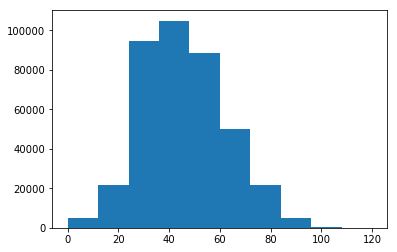

In [19]:
plt.hist(age);

Even if we cannot be certain about this, since there is no information about this on the dataset, we can safely assume that values for age that are above 110 are probably typos or outliers. It might also be the way that it was inputed when the value of 'age' for that patient was missing: since there are no NaN values and yet, 97 98 and 99 which were used in the other columns to indicate missing values, clearly cannot be used in this one.
So we will remove the columns that have the age value>110.

In [20]:
df.drop(df.loc[df['AGE']>110].index, inplace=True)

In [21]:
df['AGE'].value_counts()

37     9019
45     8925
40     8909
30     8899
46     8891
       ... 
103       6
102       3
105       2
104       1
106       1
Name: AGE, Length: 107, dtype: int64

Now that we have taken care of the outliers for this column in the Dataframe we can remove it to add it again once we finish the rest of the data processing.

In [22]:
df.drop('AGE', axis=1, inplace=True)

In [23]:
#replacing 97,98 and 99 with NaNs
for i in df.columns:
    df[i]=df[i].replace([97,98,99], np.NaN)

In [24]:
df.isna().sum()

SEX                    0
PATIENT_TYPE           0
PNEUMONIA              4
PREGNANT          210870
DIABETES            1440
COPD                1313
ASTHMA              1309
INMSUPR             1449
HIPERTENSION        1388
OTHER_DISEASE       2136
CARDIOVASCULAR      1391
OBESITY             1353
RENAL_CHRONIC       1350
TOBACCO             1433
dtype: int64

As we saw before most missing values are in the column "PREGNANT".
<br>We want to replace them but not just with the mode, but keeping the same percentage of values from the original data.
<br>We will look at how the percentage is distributed, filtering out for now the null values.

In [25]:
preg=pd.DataFrame()
preg=df['PREGNANT']
preg.drop(preg.loc[preg>3].index, inplace=True)

In [26]:
preg.value_counts(normalize=True)

2.0    0.984793
1.0    0.015207
Name: PREGNANT, dtype: float64

This tells us the true percentage of people pregnant and not pregnant. We will use these as the percentages for filling the NaN values.

In [27]:
df['PREGNANT'].fillna(np.random.choice([1, 2], 
                                    p=[0.02,0.98]), inplace=True)

In [28]:
#checking null values
df.isna().sum()

SEX                  0
PATIENT_TYPE         0
PNEUMONIA            4
PREGNANT             0
DIABETES          1440
COPD              1313
ASTHMA            1309
INMSUPR           1449
HIPERTENSION      1388
OTHER_DISEASE     2136
CARDIOVASCULAR    1391
OBESITY           1353
RENAL_CHRONIC     1350
TOBACCO           1433
dtype: int64

Now we can reinsert the column 'AGE' and drop all the missing values.

In [29]:
df=pd.concat([df, age], axis=1)

In [30]:
#dropping all the missing values in the database
df.dropna(inplace=True)

In [31]:
df.isna().sum()

SEX               0
PATIENT_TYPE      0
PNEUMONIA         0
PREGNANT          0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
AGE               0
dtype: int64

In [32]:
df

,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE
0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,65
2,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,55
4,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,68
5,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,40
6,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,77
1047934,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,55
1047935,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,70
1047936,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,32


Now to follow the usual convention of one hot encoding I want to change the values 2, which means no, into 0.
<br>This is true for all the columns except our target, 'PATIENT_TYPE' where 1 means they returned home and 2 means they were hospitalized. I will do this separately, and then assign the column to y.
For X I will do the necessary changes to df and then concat with 'AGE'.
<br>For sex it is going to be 1 for female and 0 for male.

In [33]:
df['PATIENT_TYPE']=df['PATIENT_TYPE'].replace(1, 0)
df['PATIENT_TYPE']=df['PATIENT_TYPE'].replace(2, 1)

In [34]:
y=df['PATIENT_TYPE']
y.value_counts(normalize=True)

0.0    0.717728
1.0    0.282272
Name: PATIENT_TYPE, dtype: float64

In [35]:
#I have to redifine age again because the old one has some null values that I dropped.
age=df['AGE']

In [36]:
df.drop(['AGE', 'PATIENT_TYPE'], axis=1, inplace=True)

In [37]:
#replacing 2 with 0 to follow the one hot encoding convention
df=df.replace(2, 0)

In [38]:
df

,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1047934,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047935,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1047936,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df=pd.concat([df,age,y], axis=1)

To leave df as the dataframe with all the info (including patient_type), since we will need it later for graphs.

Now selecting our X.

In [40]:
X=df.drop(['PATIENT_TYPE'], axis=1)

In [41]:
X

,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,77
1047934,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
1047935,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70
1047936,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [42]:
y

0          0.0
2          1.0
4          0.0
5          1.0
6          0.0
          ... 
1047933    1.0
1047934    0.0
1047935    0.0
1047936    0.0
1047937    0.0
Name: PATIENT_TYPE, Length: 388876, dtype: float64

At this point we took care of the missing values and we don't need to do one hot encoding since the values are already categorical, except for Age that we will scale after the split.
<br>We have our X and y, we can divide into train and test and start creating some models.

### Splitting into train and test set

We split our dataset into a train set that we are going to use to train our model, and a test set that we are not going to use during the building of the model, we are going to hol it out and use it only to test our model, as to simulate "unseen data" to check our model for possible overfitting.

In [43]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### Scaling the data:

In [44]:
# Instantiate StandardScaler
scaler = MinMaxScaler()
# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert into a DataFrame
X_train = pd.DataFrame(scaled_data_train, columns=X.columns)
X_train.head()

,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.619048
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.638095
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.638095


## Preliminary model with Logistic Regression:

As the first model we choose Logistic Regression and we are going to use it as a baseline model.

In [45]:
logreg = LogisticRegression(max_iter=500, random_state=19)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=500, random_state=19)

In [46]:
pred_train_log = logreg.predict(X_train)

We will take a chance here to define a few functions that will help us preview our results.

In [47]:
# defined so that I can use it for test or train
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [48]:
#to plot a normalized confusion matrix
def plot_matrix(labels, preds, cmap=None):
    cm = confusion_matrix(labels, preds)
    # To Normalize
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cmn, annot=True, fmt='.2f', cmap="Oranges")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

In [49]:
#function to disply the results of the model
def model_results(model):
    with plt.style.context('seaborn-talk'):
        #results for the train
        print(f'\n{Fore.BLUE}TRAIN{Style.RESET_ALL}')
        y_preds_train=model.predict(X_train)
        print(classification_report(y_train, y_preds_train))
#       print_metrics(y_train, y_preds_train)
        yhat_tr = model.predict_proba(X_train)
        yhat_tr = yhat_tr[:, 1]
        fpr, tpr, thresholds = roc_curve(y_train, yhat_tr)
        roc_score_train = roc_auc_score(y_train, yhat_tr)  
        print(f"Train Roc_Auc Score: {roc_score_train :.2%}")
        #results for the test
        print(f'\n{Fore.GREEN}TEST{Style.RESET_ALL}')
        y_preds_test=model.predict(X_test)
#        print_metrics(y_test, y_preds_test)
        print(classification_report(y_test, y_preds_test))        
        yhat_ts = model.predict_proba(X_test)
        yhat_ts = yhat_ts[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, yhat_ts)
        roc_score_test = roc_auc_score(y_test, yhat_ts)
        print(f"Test Roc_Auc Score: {roc_score_test :.2%}\n")
        #printing the two confusion matrices
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
        plot_confusion_matrix(model,X_train,y_train,normalize='true',ax=ax1,cmap='Oranges')
        ax1.grid(False)
        ax1.set_title("Train Confusion Matrix")
        plot_confusion_matrix(model,X_test,y_test,normalize='true',ax=ax2,cmap='Oranges')
        ax2.grid(False)
        ax2.set_title("Test Confusion Matrix")
        plt.show()

In [50]:
#plotting roc curves for multiple models
def plot_roc(models):
    colors=['blue', 'green', 'red', 'purple','orange', 'm', 'c', 'cyan', 'lime' ]
    lines=['dashed', 'dashdot', 'dotted', 'dashed', 'dashdot', 'dotted', 'dashed', 'dashdot', 'dotted']
    plt.figure(figsize=(10,8))
    for i, j, k in zip(models, lines, colors):
        yhat = i.predict_proba(X_test)
        yhat = yhat[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, yhat)
        plt.plot(fpr, tpr, label=i, alpha=0.6, linestyle=j, color=k, linewidth=1)
    plt.plot([0, 1], [0, 1], color='pink', label='No Skill', linewidth=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Test') 
    plt.legend(loc='lower right', fontsize=11)
    plt.show()


In [51]:
#comparing roc curve of the train set and test set of the same model
def compare_roc(model):
    plt.figure(figsize=(10,8))
    yhat_train = model.predict_proba(X_train)
    yhat_train = yhat_train[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, yhat_train)
    plt.plot(fpr, tpr, label='train', alpha=0.6, color='green', linewidth=2)
    yhat_test = model.predict_proba(X_test)
    yhat_test = yhat_test[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, yhat_test)
    plt.plot(fpr, tpr, label='test', alpha=0.6, linestyle='--', color='r', linewidth=2)
    yhat_log = logreg.predict_proba(X_test)
    yhat_log = yhat_log[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, yhat_log)
    # plotting also logistic regression roc curve since we are keeping it as the baseline model
    plt.plot(fpr, tpr, label='LogisticRegression', alpha=0.6,linestyle='dotted', color='b', linewidth=2)
    plt.plot([0, 1], [0, 1], color='pink', linestyle='--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right', fontsize=11)
    plt.show()

### Metrics:

Overall we would prefer to have as little false negatives as possible, because that indicates how many patients we predicted would **not** need to be hospitalized when they actually did.
<br>That would lead to unpreparedness from the hospital and we would rather not have that, even if it means on the contrary the possibility of having an extra resource that is not needed (which is if we have a false positive).
<br>Because of this we are going to look for the model with the highest **Recall**.
<br>We want our model to be good overall, and to make sure we don't lean only toward a high recall.
<br>Because of this together with Recall we are going to keep an eye on the **F1 score**, which gives us a sense of how the model is performing overall and would penalize it if the precision plummeted.
<br>We will also be comparing the model's roc_auc_score as another parameter to evaluate the general goodness of the model.
<br>All this said, let us take a look at the results of our first model.

**Results of Logistic Regression:**

In [52]:
print_metrics(y_train, pred_train_log)

Precision Score: 0.8445480217411108
Recall Score: 0.6761023870873645
Accuracy Score: 0.8735226653226221
F1 Score: 0.7509956663201521


These are our baseline results, with a recall of 68% and F1 score 75%.
Let us look at one more way to see and understand our model results.

**Confusion Matrix**:

We are going to look at both the confusion matrix for the train and test set, to make sure we are not overfitting.

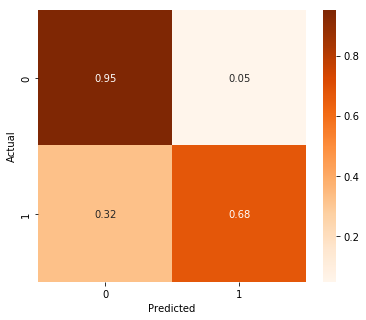

In [53]:
plot_matrix(y_train, pred_train_log)

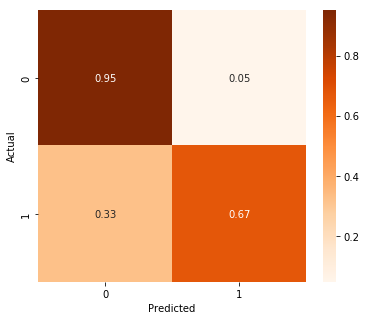

In [54]:
pred_test_log=logreg.predict(X_test)
plot_matrix(y_test, pred_test_log)

**ROC Curve:**

As we keep making models we are going to plot several ROC curves together to get a quick sense of the models compared to each other.

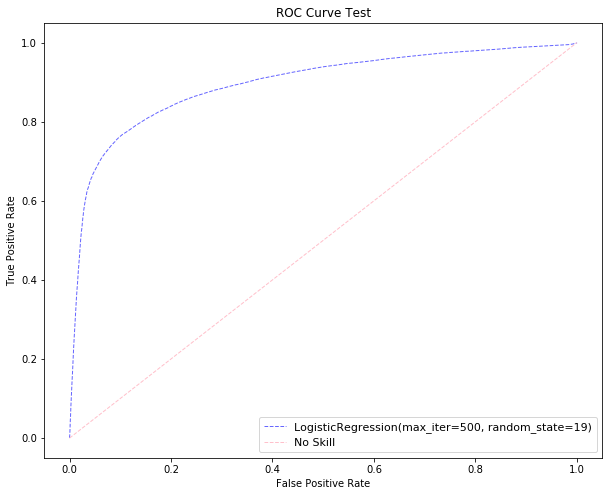

In [55]:
plot_roc([logreg])

We are also going to plot both the ROC curve for the train and for the test set, to see which models tend to overfit.

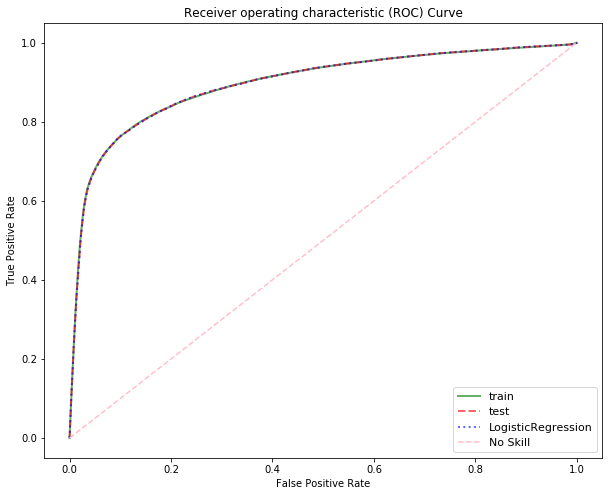

In [56]:
compare_roc(logreg)

## Decision tree Classifier
The Logistic Regression Model will be kept as our baseline model.
<br>We will try next with a Decision Tree, and see if it performs better.

In [57]:
#Create the tree
DT1 = DecisionTreeClassifier(criterion='entropy', random_state=19)

In [58]:
# fit the tree
DT1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=19)

Let us look at the results for our tree:

Results for the Decision Tree Model

TRAIN
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92    209381
         1.0       0.87      0.70      0.78     82276

    accuracy                           0.89    291657
   macro avg       0.88      0.83      0.85    291657
weighted avg       0.89      0.89      0.88    291657

Train Roc_Auc Score: 91.66%

TEST
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     69726
         1.0       0.83      0.67      0.74     27493

    accuracy                           0.87     97219
   macro avg       0.86      0.81      0.83     97219
weighted avg       0.87      0.87      0.86     97219

Test Roc_Auc Score: 87.26%



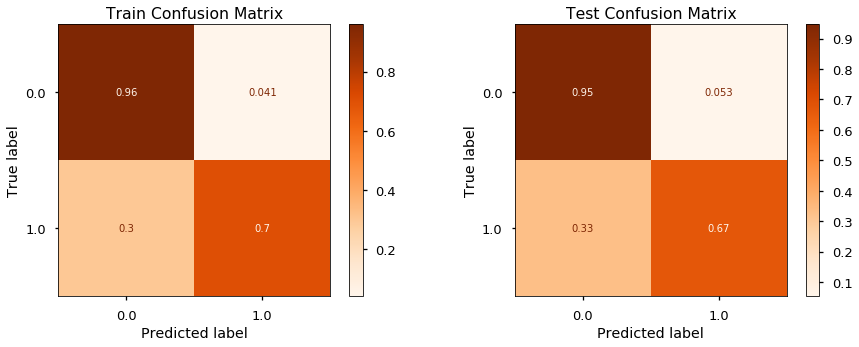

In [59]:
# Evaluate the tree
preds_train_DT1 = DT1.predict(X_train)
print(f'{Fore.RED}Results for the Decision Tree Model')
model_results(DT1)

We can see from these results that the tree is overfitting, since we see a lower accuracy, F1 score and ROC score for the test than the one for the train.
<br>This is a know problem for Decision Trees since they can be so specific and classify so well a sample, that they end up overfitting it.

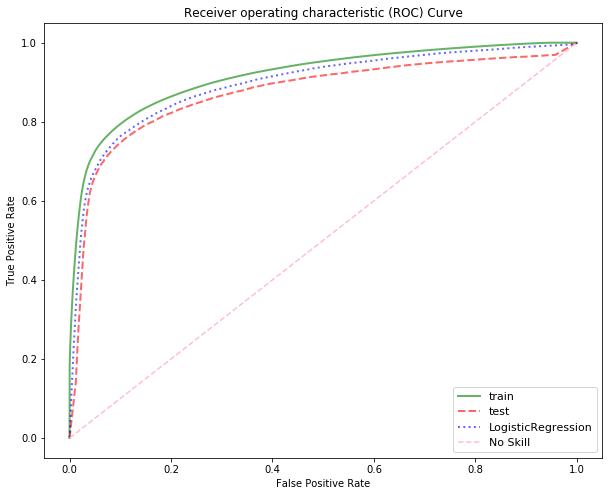

In [60]:
compare_roc(DT1)

The ROC curve confirms what we expected with the model performing worse for the test than with the train.

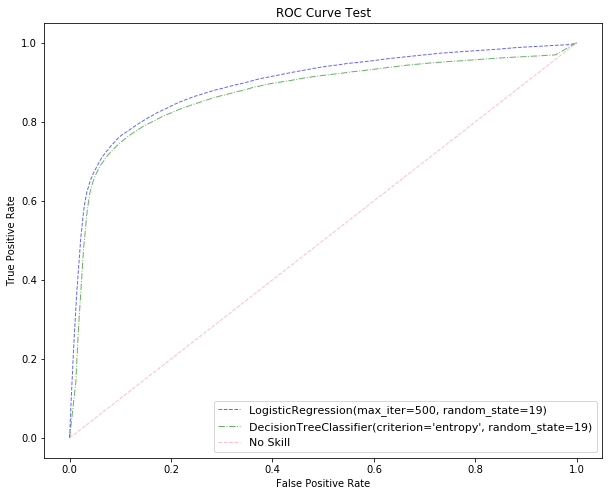

In [61]:
plot_roc([logreg,DT1])

Another possibility that we have with decision trees is that we can extract their feature importance.

In [62]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,5))
    #not sure why when I add np.sort in front of model feature it changes
    plt.barh(range(n_features), (model.feature_importances_), align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

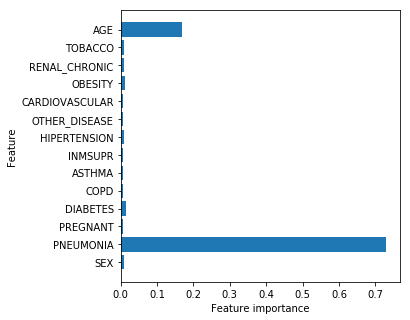

In [63]:
plot_feature_importances(DT1)

We are going to study these more in detail later for all the models together but this starts to give us a sense of some features.

### Class Imbalance
<br> One thing we have not considered yet is the fact that the classes of our target (patients sent home vs. patients hospitalized) are not balanced. <br>They are not present equally in our dataset but around 70% of the patients were sent home and only 30% were hospitalized, as we saw from the split of the data for that column.
<br> This means that a very basic model that simply predicts all the patients to be sent home would have a 70% accuracy, that's the baseline.
<br> We have a way to counteract this problem by balancing the classes with a decision tree, by specifying `class_weight='balanced'`.

In [64]:
# Instantiate Decision Tree
DT_bal = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=19)

In [65]:
# Fit Decision Tree
DT_bal.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=19)

In [66]:
# Calculate predictions for the tree
preds_train_DTbal = DT_bal.predict(X_train)

Results for the Decision Tree Model considering class imbalance

TRAIN
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91    209381
         1.0       0.76      0.79      0.78     82276

    accuracy                           0.87    291657
   macro avg       0.84      0.85      0.84    291657
weighted avg       0.87      0.87      0.87    291657

Train Roc_Auc Score: 91.66%

TEST
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90     69726
         1.0       0.73      0.76      0.74     27493

    accuracy                           0.85     97219
   macro avg       0.82      0.82      0.82     97219
weighted avg       0.85      0.85      0.85     97219

Test Roc_Auc Score: 87.22%



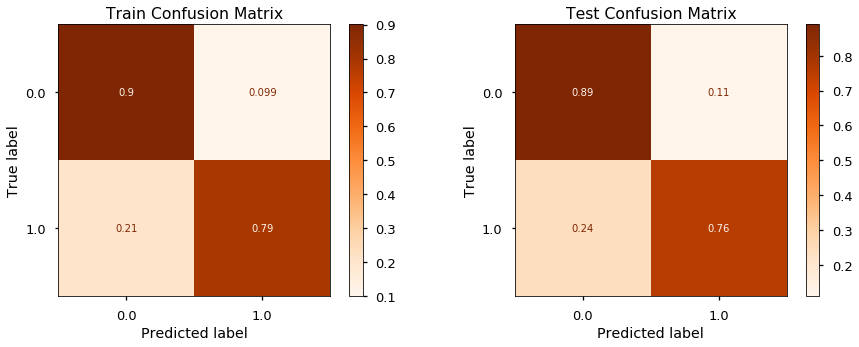

In [67]:
# Evaluate the tree
print(f'{Fore.RED}Results for the Decision Tree Model considering class imbalance')
model_results(DT_bal)

We can see that by balancing out the classes, we obtain a much better recall, and we have more True Positive cases and less False Negatives.
We are still overfitting, but that is to be expected, we have a bit lower accuracy but the good news is the F1 score and Roc_Auc have stayed almost the same.

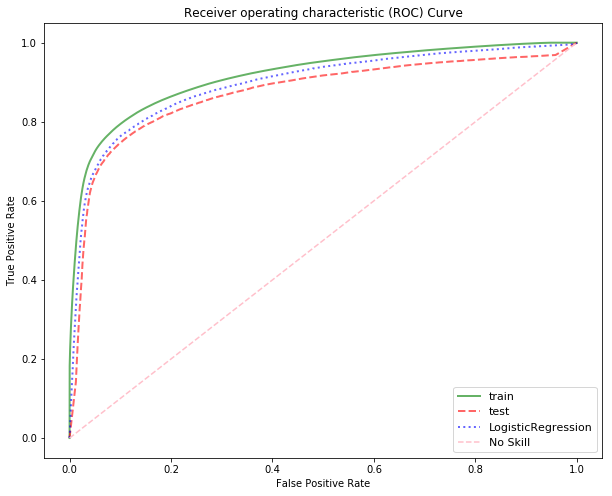

In [68]:
compare_roc(DT_bal)

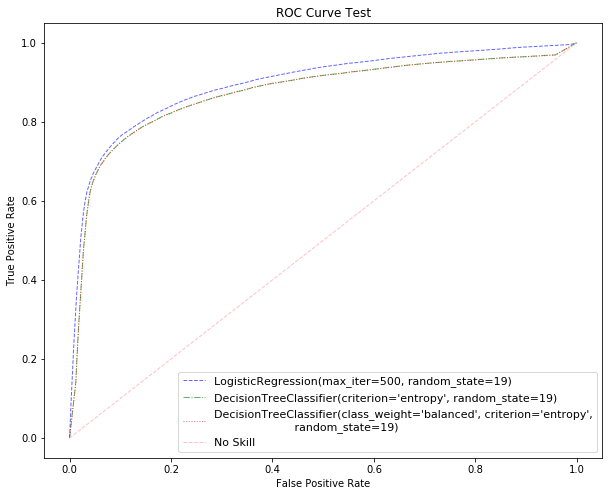

In [69]:
plot_roc([logreg, DT1, DT_bal])

As we can see from the confusion matrix we started to have more False Positives and the predictions of the majority class (0, people returned home) has decreased. This reflects also in the accuracy score and F1 score.
<br>On the bright side the predictions for the minority class (1, hospitalized) have improved, with less false negatives and a recall that went from 0.67 to 0.76.
<br>The Decision tree without class imbalance leads to an overall more precise model: less falses overall, negative and positive, more patients categorized correctly.
<br> On the other hand the model that accounts for class imbalance makes more mistakes, has lower accurcay precision and F1 score, but it has overall less false negatives.
<br>Given the specific problem we would recommend staying on the safer side, trying to minimize the false negatives instead of the false positives.

### Random Forest

To try to compensate for the overfitting of the Decision Tree we can increase the variance. And that is exactly what Random Forests are for.
<br>So let us create our first Random Forest and see how it performs.

In [70]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(random_state=19)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=19)

Results for the Random Forest Model

TRAIN
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92    209381
         1.0       0.86      0.71      0.78     82276

    accuracy                           0.89    291657
   macro avg       0.88      0.83      0.85    291657
weighted avg       0.89      0.89      0.88    291657

Train Roc_Auc Score: 91.42%

TEST
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     69726
         1.0       0.83      0.68      0.75     27493

    accuracy                           0.87     97219
   macro avg       0.86      0.81      0.83     97219
weighted avg       0.87      0.87      0.87     97219

Test Roc_Auc Score: 89.03%



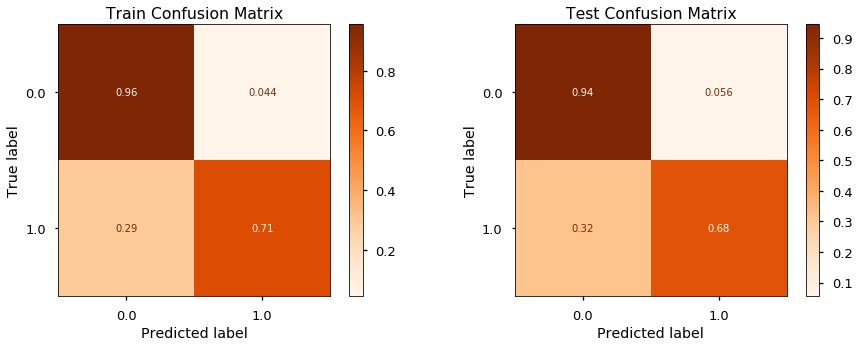

In [71]:
print(f'{Fore.RED}Results for the Random Forest Model')
model_results(forest)

It does not have a great recall, but the F1 score and ROC score are both higher than our last model.

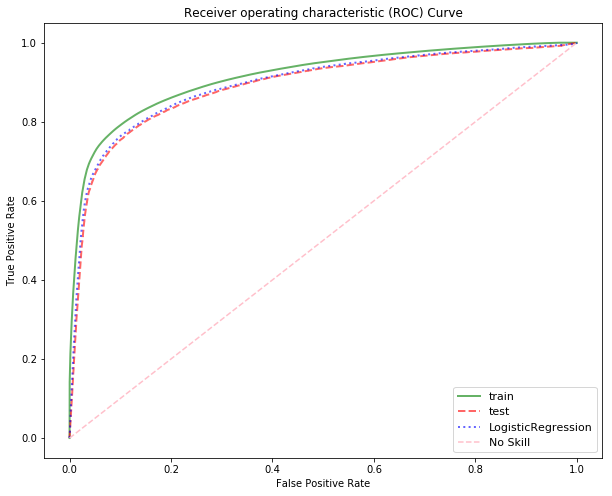

In [72]:
compare_roc(forest)

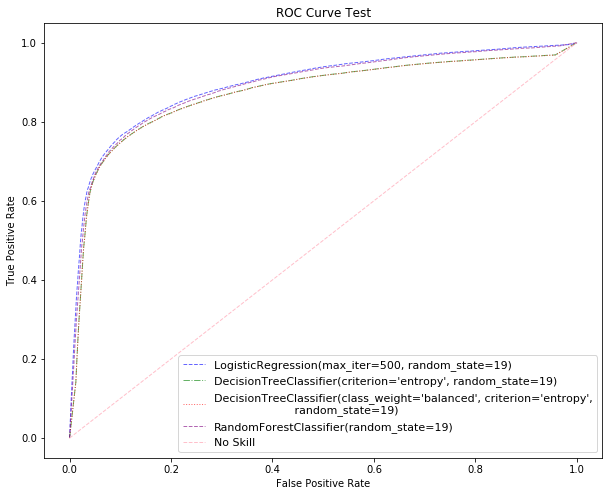

In [73]:
plot_roc([logreg, DT1, DT_bal, forest])

As we saw, the AUC score is higher, it's getting closer to the Logistic Regression model.
This model is also less prone to overfitting compared to the DecisionTree, because of the extra variance it introduces.

### Random Forest class imbalance:
Now accounting for the class imbalance in Random Forest.
<br>Just like for the decision tree, we can account for the class imbalance to try to improve our recall.

In [74]:
forest_bal = RandomForestClassifier(random_state=19, class_weight='balanced')
forest_bal.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=19)

Results for the Random Forest Model considering class imbalance

TRAIN
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91    209381
         1.0       0.77      0.79      0.78     82276

    accuracy                           0.87    291657
   macro avg       0.84      0.85      0.84    291657
weighted avg       0.87      0.87      0.87    291657

Train Roc_Auc Score: 91.45%

TEST
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     69726
         1.0       0.74      0.75      0.75     27493

    accuracy                           0.86     97219
   macro avg       0.82      0.82      0.82     97219
weighted avg       0.86      0.86      0.86     97219

Test Roc_Auc Score: 88.72%



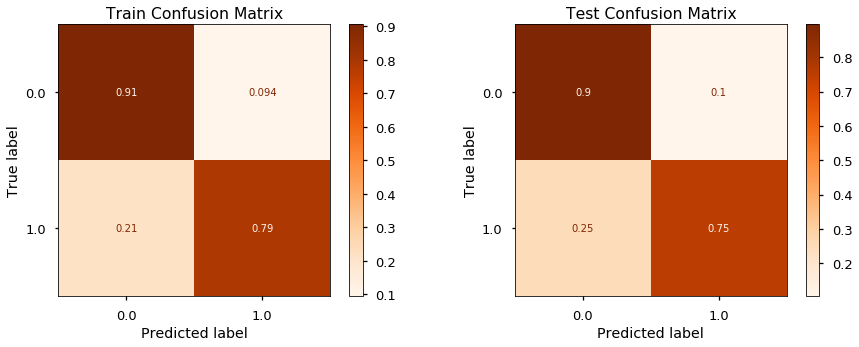

In [75]:
print(f'{Fore.RED}Results for the Random Forest Model considering class imbalance')
model_results(forest_bal)

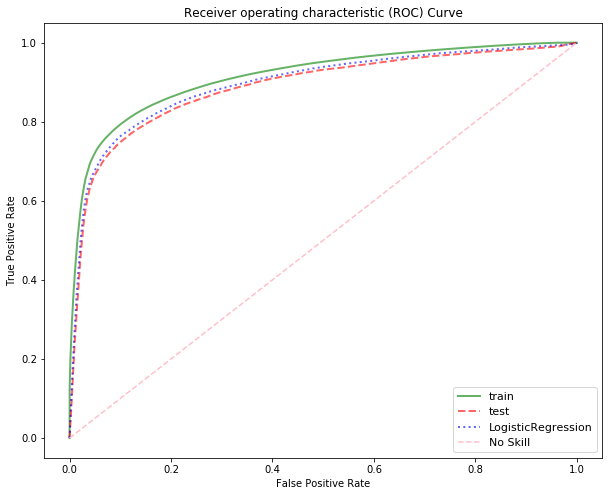

In [76]:
compare_roc(forest_bal)

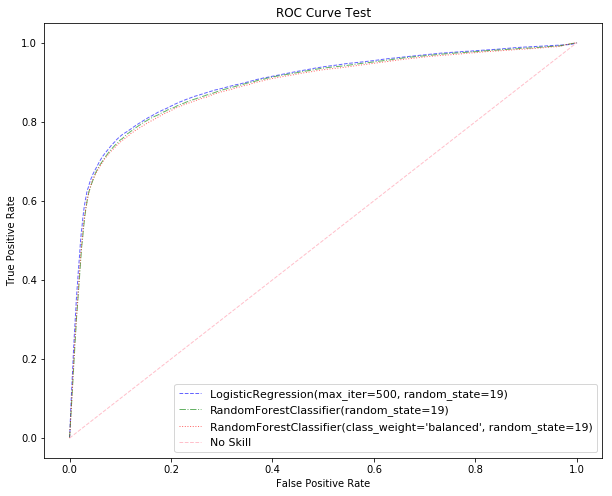

In [77]:
plot_roc([logreg, forest, forest_bal])

The recall has increased, the F1 score stayed the same and the ROC descreased, but only slightly.

## GridSearchCV for Random Forest:

We want to improve and fine tune our Random Forest model, and to do so we are going to run a few GridSearches to try to find the best parameters that maximize the results for the Forest.

### First GridSearch:

In [78]:
# create the grid with parameters:

rf_param_grid = { 'n_estimators':[10,30,100],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 6, 10, 30],
                 'min_samples_split':[5, 10],
                 'min_samples_leaf':[3, 6]
    
}

It is very time consuming to run all of the options so we pickled the GridSearchCV models after we ran them and fit them.
<br>The pickled files were also too large for the Github Repository so we had to remove them.
<br>We show below all the code that was used for demonastrative purposes, but we comment it out and keep only the results of the search.

In [79]:
""" code with which we ran the GridSearchCV
rf_grid_search = GridSearchCV(forest_bal, rf_param_grid,cv=3)
rf_grid_search.fit(X_train, y_train)

filename = 'Pickled_models/CVforest.pkl'

# code with which we saved the model

joblib.dump(rf_grid_search, filename)

# code to load the model and view the results.
loaded_model = joblib.load(filename)

forest_accuracy=loaded_model.best_score_ 
best_params=loaded_model.best_params_
print(f"Testing Accuracy: {forest_accuracy:.2%}")
print("")
print(f"Best Parameters:{best_params}")

"""

' code with which we ran the GridSearchCV\nrf_grid_search = GridSearchCV(forest_bal, rf_param_grid,cv=3)\nrf_grid_search.fit(X_train, y_train)\n\nfilename = \'Pickled_models/CVforest.pkl\'\n\n# code with which we saved the model\n\njoblib.dump(rf_grid_search, filename)\n\n# code to load the model and view the results.\nloaded_model = joblib.load(filename)\n\nforest_accuracy=loaded_model.best_score_ \nbest_params=loaded_model.best_params_\nprint(f"Testing Accuracy: {forest_accuracy:.2%}")\nprint("")\nprint(f"Best Parameters:{best_params}")\n\n'

The parameters that we obtained from the Gridsearch are:

In [80]:
print("Testing Accuracy: 86.63% \n Best Parameters:{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10}")

Testing Accuracy: 86.63% 
 Best Parameters:{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10}


Once we identified the best parameters we can run a new Random Forest with those parameters and see how it performs.

In [81]:
for_CV1 = RandomForestClassifier(random_state=19,class_weight='balanced',criterion='entropy',
                                 max_depth= 6, min_samples_leaf= 6, min_samples_split= 5,n_estimators=10)

In [82]:
for_CV1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=10, random_state=19)

In [83]:
preds_forCV1=for_CV1.predict(X_train)

Results for the Random Forest model with best parameters after First GridSeachCV

TRAIN
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90    209381
         1.0       0.76      0.74      0.75     82276

    accuracy                           0.86    291657
   macro avg       0.83      0.83      0.83    291657
weighted avg       0.86      0.86      0.86    291657

Train Roc_Auc Score: 89.22%

TEST
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     69726
         1.0       0.76      0.74      0.75     27493

    accuracy                           0.86     97219
   macro avg       0.83      0.82      0.83     97219
weighted avg       0.86      0.86      0.86     97219

Test Roc_Auc Score: 89.17%



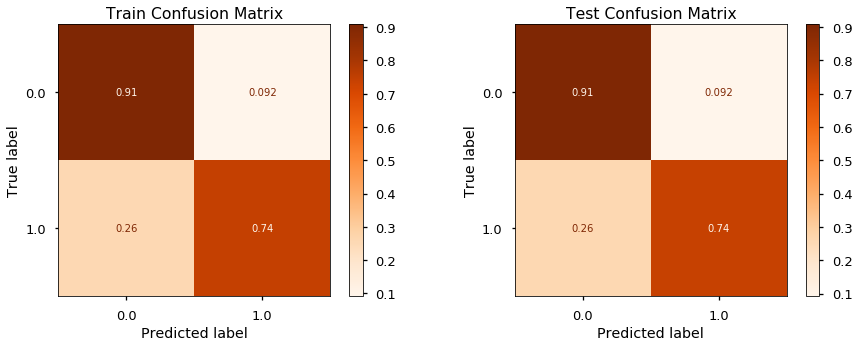

In [84]:
print(f'{Fore.RED}Results for the Random Forest model with best parameters after First GridSeachCV')
model_results(for_CV1)

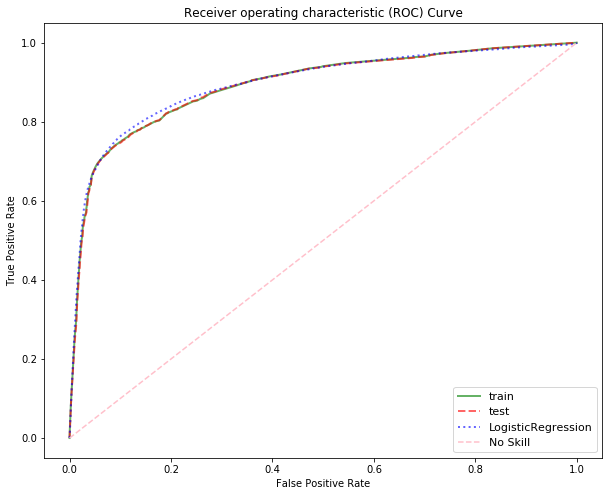

In [85]:
compare_roc(for_CV1)

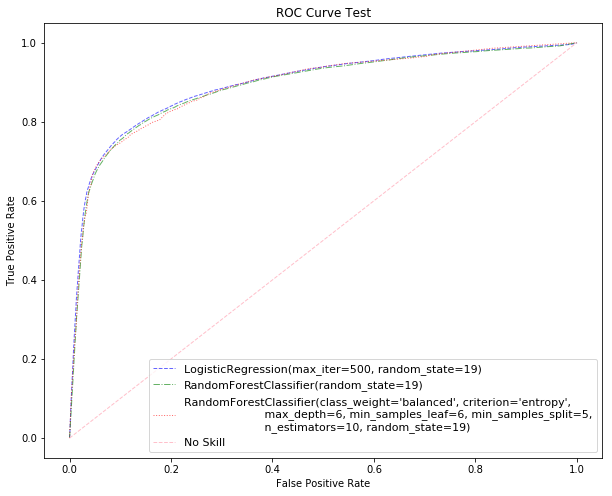

In [86]:
plot_roc([logreg, forest,  for_CV1])

The recall had slightly decreased and the AUC score has slightly increase. The model still needs more tuning.

### Second GridSearch:

Now we are going to try a second Gridsearch, based on the parameters that our first grid returned, to see if we can further improve our model.

In [87]:
rf_param_grid2 = { 'n_estimators':[10, 15],
                 'criterion': ['entropy'],
                 'max_depth': [None,3,6],
                 'min_samples_split':[1,3,5],
                 'min_samples_leaf':[6, 10, 20]
    
}

The process was the same as with the previous Gridsearch.
The code used was the same as above and the results that we obtained from this second search are:

In [88]:
print("Testing Accuracy: 86.63% \n Best Parameters:{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10}")

Testing Accuracy: 86.63% 
 Best Parameters:{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 10}


In [89]:
for_CV2 = RandomForestClassifier(random_state=19,class_weight='balanced',criterion='entropy', max_depth= 6,
                                 min_samples_leaf= 6, min_samples_split=5, n_estimators= 10)
for_CV2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=10, random_state=19)

Results for the Random Forest model with best parameters after the second GridSeachCV

TRAIN
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90    209381
         1.0       0.76      0.74      0.75     82276

    accuracy                           0.86    291657
   macro avg       0.83      0.83      0.83    291657
weighted avg       0.86      0.86      0.86    291657

Train Roc_Auc Score: 89.22%

TEST
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     69726
         1.0       0.76      0.74      0.75     27493

    accuracy                           0.86     97219
   macro avg       0.83      0.82      0.83     97219
weighted avg       0.86      0.86      0.86     97219

Test Roc_Auc Score: 89.17%



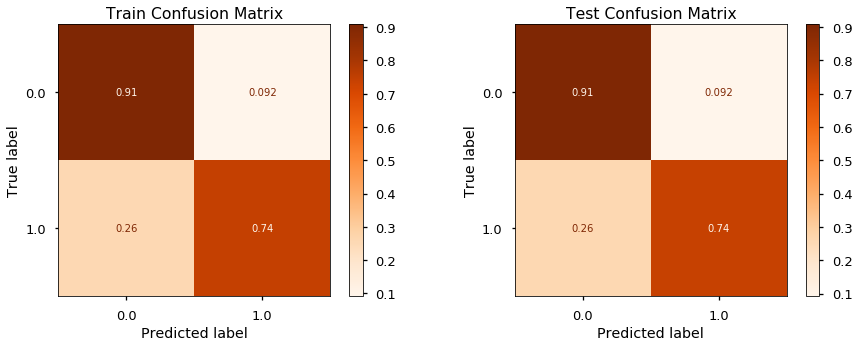

In [90]:
print(f'{Fore.RED}Results for the Random Forest model with best parameters after the second GridSeachCV')
model_results(for_CV2)

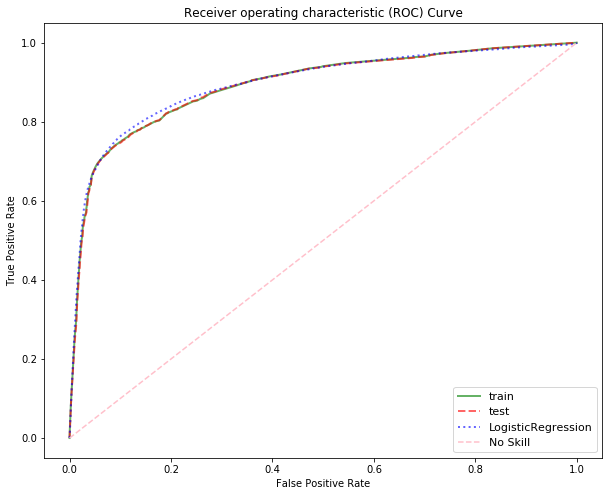

In [91]:
compare_roc(for_CV2)

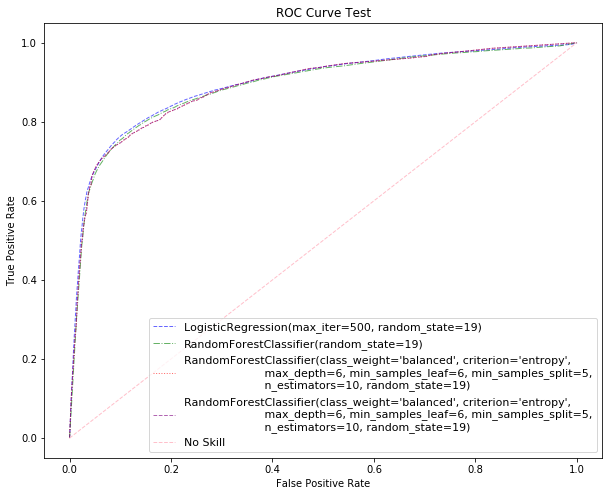

In [92]:
plot_roc([logreg,forest, for_CV1, for_CV2])

This model performed almost exactly as the previous one.
<br>We are not going to describe now all the different attempts made, but the following gridsearch proved to have better results.

### Third GridSearch:

Now running the third GridSearch CV:

In [93]:
rf_param_grid3 = { 'n_estimators':[20,30,40],
                 'criterion': ['gini'],
                 'max_depth':[None],
                 'min_samples_split':[3,5],
                 'min_samples_leaf':[5, 10, 20]
    
}

Parameters obtained by this Third Search:

In [94]:
print("Testing Accuracy: 85.66% \n Best Parameters:{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 30}")

Testing Accuracy: 85.66% 
 Best Parameters:{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 30}


In [95]:
for_CV3 = RandomForestClassifier(random_state=19,class_weight='balanced',criterion='gini', max_depth= None, 
                                 min_samples_leaf= 5, min_samples_split= 3, n_estimators=30)

In [96]:
for_CV3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       min_samples_split=3, n_estimators=30, random_state=19)

Results for the Random Forest model with best parameters after Third GridSeachCV

TRAIN
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90    209381
         1.0       0.74      0.78      0.76     82276

    accuracy                           0.86    291657
   macro avg       0.83      0.84      0.83    291657
weighted avg       0.86      0.86      0.86    291657

Train Roc_Auc Score: 90.66%

TEST
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     69726
         1.0       0.74      0.78      0.76     27493

    accuracy                           0.86     97219
   macro avg       0.82      0.83      0.83     97219
weighted avg       0.86      0.86      0.86     97219

Test Roc_Auc Score: 89.86%



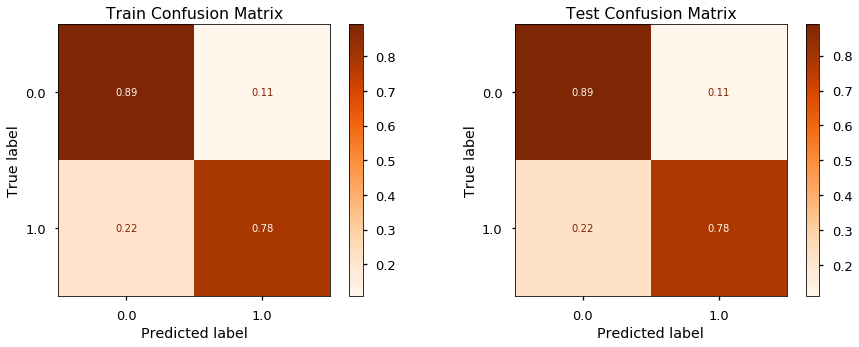

In [97]:
print(f'{Fore.RED}Results for the Random Forest model with best parameters after Third GridSeachCV')
model_results(for_CV3)

As we can see comparing the Test set results and the ROC score, this model gave a better result for all our most important parameters, Recall F1 and ROC.
ROC increased only slightly, but we can see the F1 went from 0.75 to 0.76 and the Recall from 0.74 to 0.77!
<br>This Forest seems to be performing better than all the previous ones in terms of these parameters.

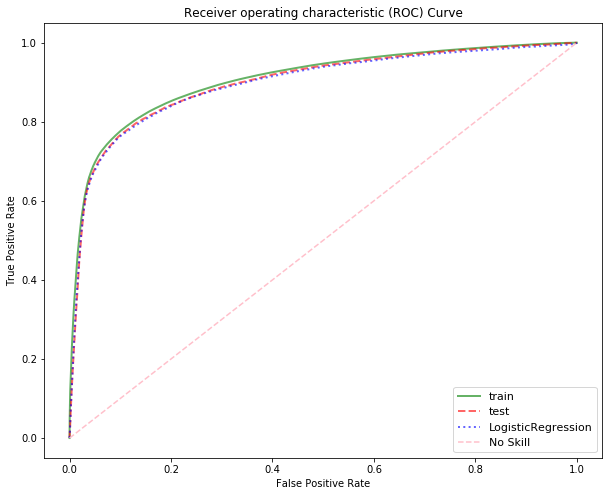

In [98]:
compare_roc(for_CV3)

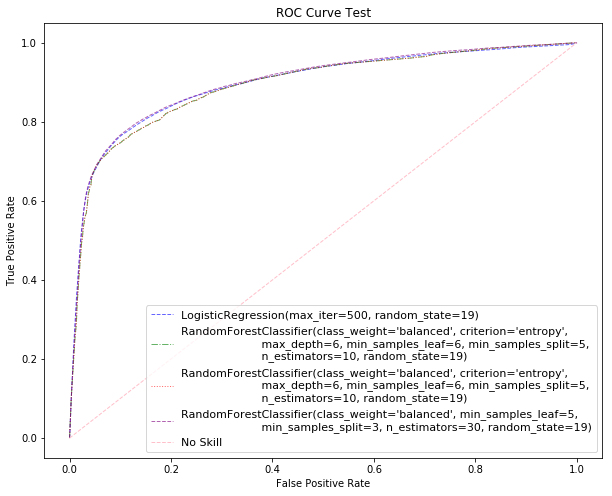

In [99]:
plot_roc([logreg, for_CV1, for_CV2, for_CV3])

### Fourth GridSearch:

Running the fourth and last GrisSearch to try to further improve our model.

In [100]:
rf_param_grid4 = { 'n_estimators':[30],
                 'criterion': ['gini'],
                 'max_depth':[None],
                 'min_samples_split':[2,3],
                 'min_samples_leaf':[2,3,5]
    
}

The results we had obtained from the Fourth Gridsearch are:

In [101]:
print('Testing Accuracy: 85.66%')

print("Best Parameters:{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30}")

Testing Accuracy: 85.66%
Best Parameters:{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30}


Only one parameter is different form the previous Forest, it is min_samples_split. We will see if this will make a big difference but probably not.

In [102]:
for_CV4 = RandomForestClassifier(random_state=19,class_weight='balanced',criterion='gini', max_depth= None, 
                                 min_samples_leaf= 5, min_samples_split= 2, n_estimators=30)

In [103]:
for_CV4.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       n_estimators=30, random_state=19)

In [104]:
pred_test=for_CV4.predict(X_test)

Results for the Random Forest model with best parameters after Fourth GridSeachCV

TRAIN
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90    209381
         1.0       0.74      0.78      0.76     82276

    accuracy                           0.86    291657
   macro avg       0.83      0.84      0.83    291657
weighted avg       0.86      0.86      0.86    291657

Train Roc_Auc Score: 90.66%

TEST
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     69726
         1.0       0.74      0.78      0.76     27493

    accuracy                           0.86     97219
   macro avg       0.82      0.83      0.83     97219
weighted avg       0.86      0.86      0.86     97219

Test Roc_Auc Score: 89.86%



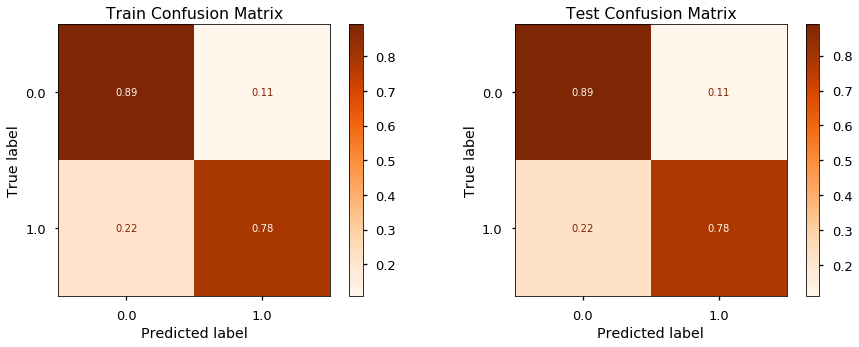

In [105]:
print(f'{Fore.RED}Results for the Random Forest model with best parameters after Fourth GridSeachCV')
model_results(for_CV4)

As we could expect, since the models are very similar the results are also pretty much the same for these last two models.

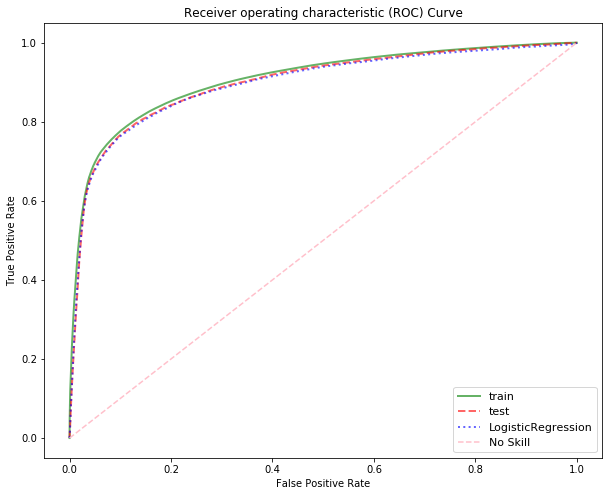

In [106]:
compare_roc(for_CV4)

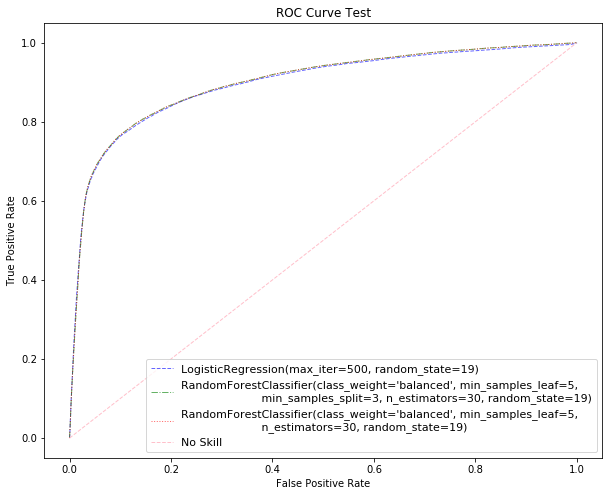

In [107]:
plot_roc([logreg, for_CV3, for_CV4])

## Gradient Boosting

Gradient Boosting is the final technique that we are going to use in an attempt to maximize the performance of our model.

In [108]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [109]:
gbc.score(X_test, y_test)

0.8748598524979685

In [110]:
recall_score(y_test, gbc.predict(X_test))

0.6804641181391627

Results for the Gradient Boost model

TRAIN
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92    209381
         1.0       0.85      0.68      0.76     82276

    accuracy                           0.88    291657
   macro avg       0.87      0.82      0.84    291657
weighted avg       0.87      0.88      0.87    291657

Train Roc_Auc Score: 90.10%

TEST
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     69726
         1.0       0.85      0.68      0.75     27493

    accuracy                           0.87     97219
   macro avg       0.87      0.82      0.84     97219
weighted avg       0.87      0.87      0.87     97219

Test Roc_Auc Score: 90.02%



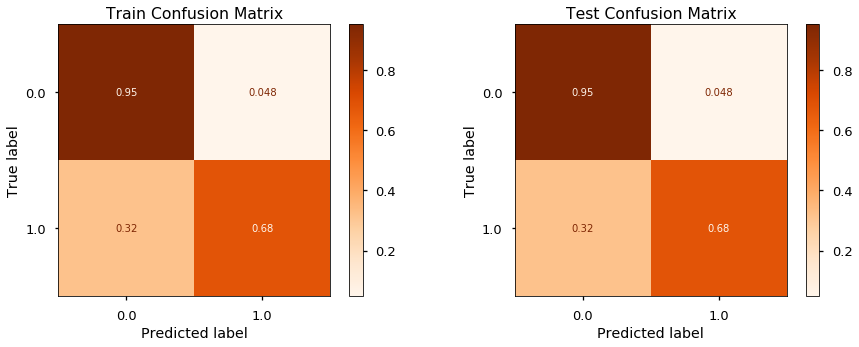

In [111]:
print(f'{Fore.RED}Results for the Gradient Boost model')
model_results(gbc)

We can tell that this model is very good because it has the highest ROC that we have seen so far for the test.
And despite its very good performance it is not overfitting.
<br>Unfortunately it doesn't have a very good recall, which is the metric we care about the most.

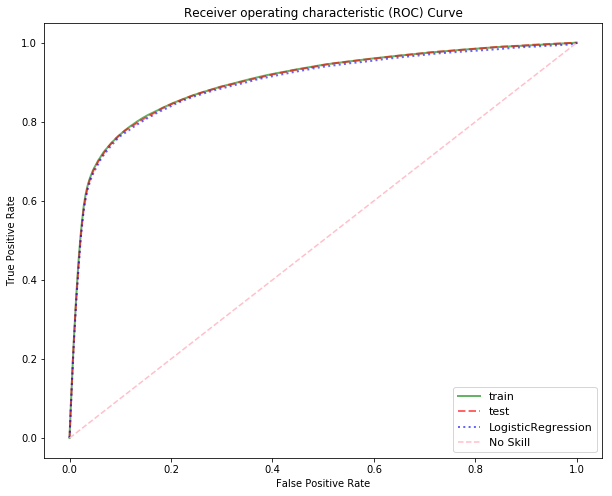

In [112]:
compare_roc(gbc)

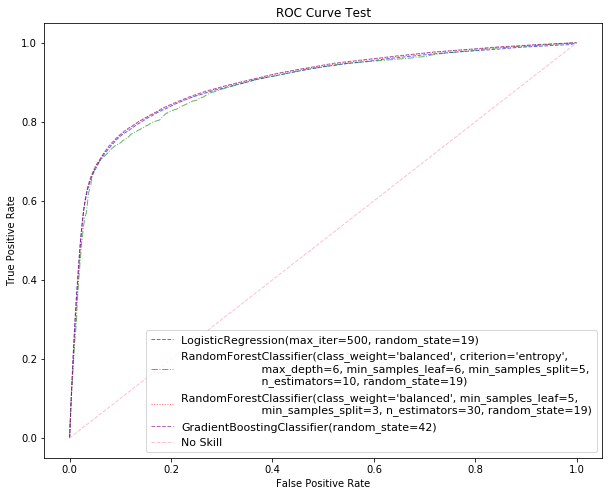

In [113]:
plot_roc([logreg, for_CV1,for_CV3, gbc])

# Results:
Now in order to draw some conclusions let us compare more closely the results of our top 2 performing models: the Random Forest after the fourth GridSearch and GradientBoost.

In [114]:
#selecting the best two models
models=[for_CV4, gbc]

Creating a dataframe with the results:

In [115]:
recalls=[]
F1s=[]
roc_aucs=[]
for i in (models):
    preds=i.predict(X_test)
    recalls.append(recall_score(y_test, preds))
    F1s.append(f1_score(y_test, preds))
    yhat_ts = i.predict_proba(X_test)
    yhat_ts = yhat_ts[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, yhat_ts)
    roc_score_test = roc_auc_score(y_test, yhat_ts)
    roc_aucs.append(roc_score_test)

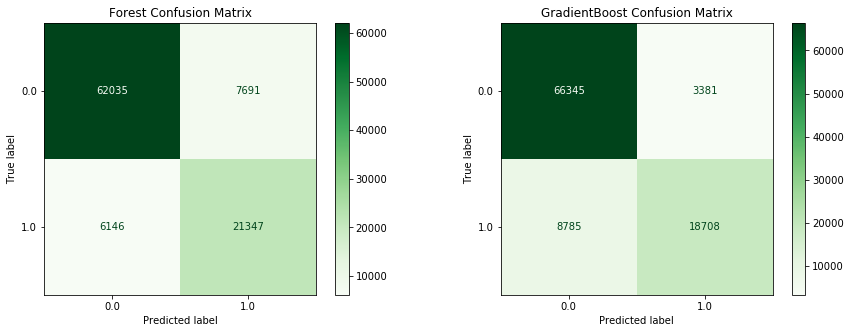

,model,recall,F1,AUC
0,for_CV4,0.776452,0.755232,0.898580
1,gbc,0.680464,0.754629,0.900169


In [116]:
results=pd.DataFrame([])
results['model']=['for_CV4', 'gbc']
results['recall']=recalls
results['F1']=F1s
results['AUC']=roc_aucs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
plot_confusion_matrix(for_CV4,X_test,y_test,ax=ax1,cmap='Greens')#, normalize='true')
ax1.grid(False)
ax1.set_title("Forest Confusion Matrix")
plot_confusion_matrix(gbc,X_test,y_test,ax=ax2,cmap='Greens')
ax2.grid(False)
ax2.set_title("GradientBoost Confusion Matrix")
plt.show()
results

As we can see the F1 scores for the two models are very similar.
<br>The GradientBoost model has a higher AUC but just by 0.002.
<br>The Random Forest though has a recall 10% higher compared to Gradient Boost.
We can see from the confusion matrices that this model identified correctly roughly 2600 more cases that would have been False Negatives in the Gradient Boost model.
<br>At the same time as we can see from the ROC curve plotted below the overall performance of the models is very similar.
<br>We feel very strongly that the Random Forest is the best one for this case, since even if it doesn't have strictly the best performance in terms of roc and F1 score, it is only very slightly inferior to its counterpart, while perfmorming 10% better in terms of recall.
<br>In this specific case as it is often in medicine, we would rather have a false positive results compared to a false negative, as that would mean having extra resources and being overprepared, rather than having to face a shortage of stuff and equipment in front of a sick patients that required hospitalization.

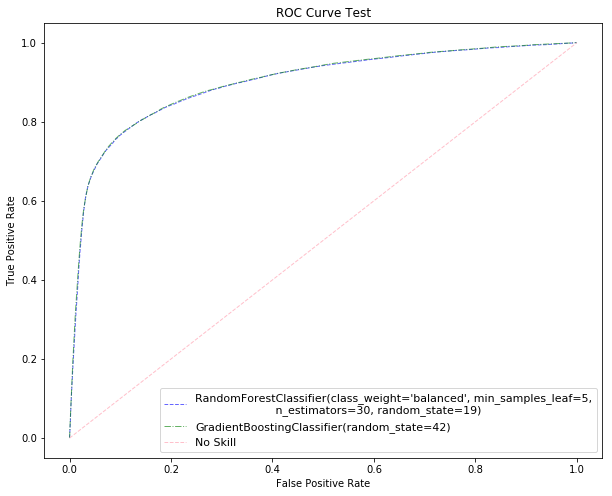

In [117]:
plot_roc([for_CV4, gbc]);

## Feature Importances:

One more very important step in our study is to understand what are the main variables that determined the outcome in our models, or simply put what are the most relevant factors that determine if a person is at high risk or not to be hospitalized.
To do this we can extract this information directly from our models and then we are going to study the top 5 important features.

First we will do this for our top 2 models.

In [118]:
# Feature Importance
feat=[]
imp=[]
mod=[]
for i in models:
    feature_used = df.columns
    for fi, feature in zip(i.feature_importances_, feature_used):
        mod.append(i)
        imp.append(fi)
        feat.append(feature)
feat_imp=pd.DataFrame([])
feat_imp['model']=mod
feat_imp['features']=feat
feat_imp['importance']=imp

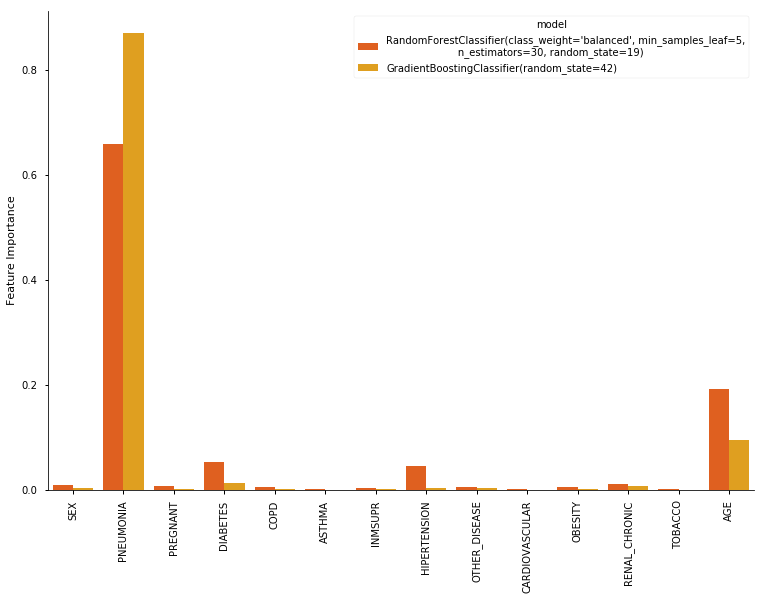

In [119]:
plt.style.use('seaborn-notebook')
g = sns.catplot(
    data=feat_imp, kind="bar",
    x="features", y="importance", hue="model", ci=None, legend_out=False, palette='autumn'
)
g.set_axis_labels("", "Feature Importance")
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
g.set_xticklabels(labels=feat, rotation=90);

We see that the most important features for our top 2 models are Pneumonia, Age, Diabetes, Hypertension and Sex.
But if we are curious about what more models recommend, and to make sure we don't leave out any important factor we can do the same for more models.
We decided to look at the Balanced DecisionTree, Balanced Forest, Forest after second Gridsearch and our usual top 2.

In [120]:
models2=[DT_bal,forest_bal, for_CV2, for_CV4, gbc]

In [121]:
feat2=[]
imp2=[]
mod2=[]
for i in models2:
    feature_used = df.columns

    for fi, feature in zip(i.feature_importances_, feature_used):
        mod2.append(i)
        imp2.append(fi)
        feat2.append(feature)
feat_imp2=pd.DataFrame([])
feat_imp2['model']=mod2
feat_imp2['features']=feat2
feat_imp2['importance']=imp2


''

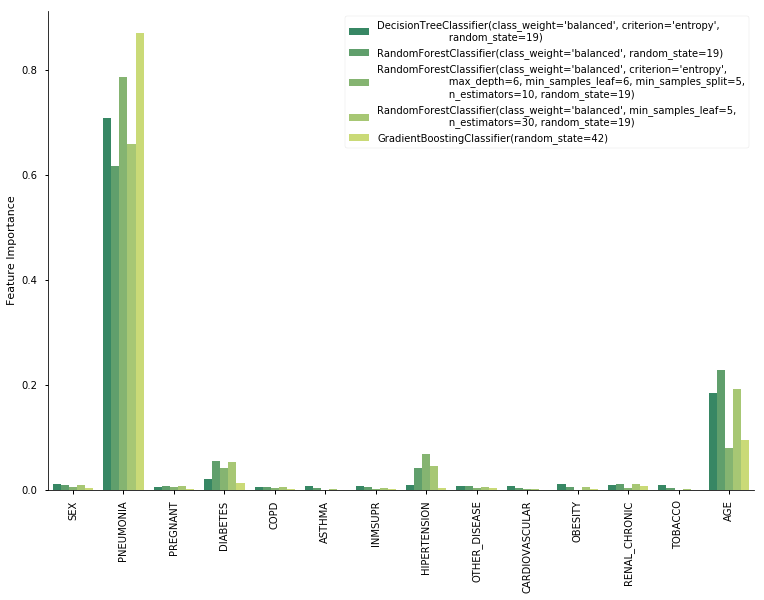

In [122]:
plt.style.use('seaborn-notebook')
g = sns.catplot(
    
    data=feat_imp2, kind="bar",
    x="features", y="importance", hue="model", ci=None,legend_out=False, palette='summer'
)
g.set_axis_labels("", "Feature Importance")
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
g.set_xticklabels(labels=feat, rotation=90)
g.add_legend()
;

It is interesting (and reassuring) to see that even the other models agree on the top features,and we can also double check to see that numbers confirm what we see visually, by summing all the feature importances for these 5 models.

In [123]:
feat_imp2.groupby('features').sum()

,importance
features,
AGE,0.780069
ASTHMA,0.011080
CARDIOVASCULAR,0.013519
COPD,0.019087
DIABETES,0.181511
HIPERTENSION,0.167402
INMSUPR,0.019734
OBESITY,0.022747
OTHER_DISEASE,0.024696


Numbers confirm that  the five most important features in our selection overall for the models are:
- Pneumonia
- Age
- Diabetes
- Hypertension 
- Sex
<br>Let us take a closer look at each one of these.

### Pneumonia

Let us study what was the distribution of patients with pneumonia.

Calculating the percentage of patients that had pneumonia, whether they where hospitalized or not.

In [124]:
df.loc[df["PNEUMONIA"]==1]['PATIENT_TYPE'].value_counts(normalize=True)

1.0    0.856639
0.0    0.143361
Name: PATIENT_TYPE, dtype: float64

We can see how patients sick with pneumonia had an 86% chance to be hospitalized.

Calculating the percentage of patients that did not have pneumonia, whether they where hospitalized or not.

In [125]:
df.loc[df["PNEUMONIA"]==0]['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.877872
1.0    0.122128
Name: PATIENT_TYPE, dtype: float64

Out of the patients that did not have pneumonia, only 12% needed hospitalization and 88% of them did not non hospitalization.

''

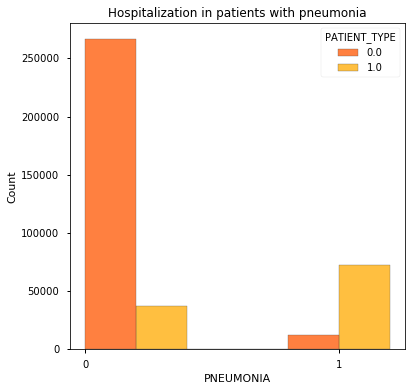

In [126]:
f, ax = plt.subplots(figsize=(6, 6))
sns.histplot(df,
    x='PNEUMONIA', 
    hue='PATIENT_TYPE',
    palette='autumn',
    edgecolor=".3",
    multiple="dodge",
    binwidth=0.4
)
ax.set_xticks([0,1])
ax.set_title('Hospitalization in patients with pneumonia')
;

We can see the astounding difference in the graph in hospitalization, between patient with pneumonia and without.

In [127]:
print(f'{Fore.GREEN}Out of the patients that had pneumonia, 86% of them needed hospitalization, while for patients without pneumonia the chance of hospitalization was 12%.')

Out of the patients that had pneumonia, 86% of them needed hospitalization, while for patients without pneumonia the chance of hospitalization was 12%.


### Age
The second factor we found relevant for determining whether a patient was high risk or not was the age.
<br>Let us see this in the following graph where we plotted hospitalization status vs age.

''

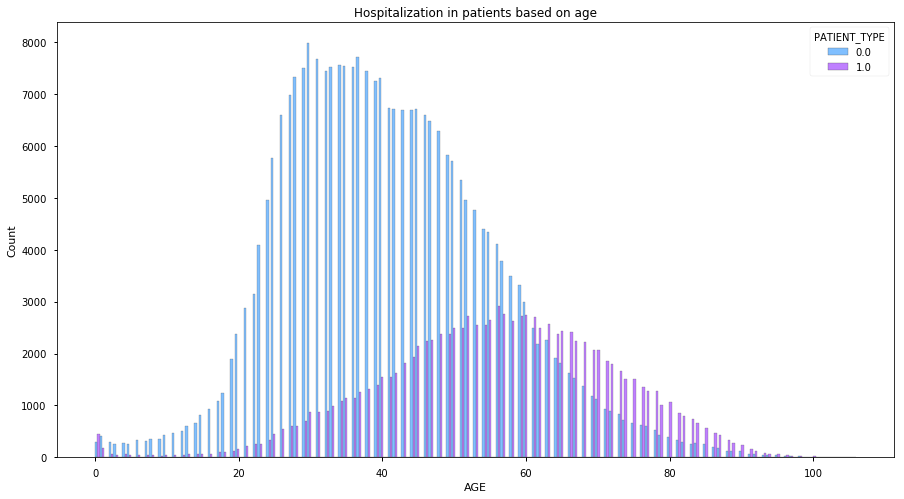

In [128]:
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(df,
    x='AGE', 
    hue="PATIENT_TYPE",
    palette='cool',#'hot', 'mako', 
    edgecolor=".3",
    multiple="dodge",
)
ax.set_title('Hospitalization in patients based on age')
;

There is a clear difference in the age distribution between patients that needed hospitalization and the ones who didn't.
<br>It seems that older people are much more likely to neet do be hospitalized, especially in the window between 60 and 100, where the number of patients hospitalizes is greater than the ones that weren't.
<br>There is the exception of 0 and 1 year olds where hospitalization was more likely than not. Let us look at some specific ranges to get a better sense.

To be able to study specific ranges we first need to divide the age column in bins:

In [129]:
df['AGE_bins']=df['AGE']
bins = [0, 10 , 20 , 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['0-10','10-20', '20-30','30-40','40-50','50-60','60-70', '70-80', '80-90', '90-100', '100-110']
df['AGE_bins'] = pd.cut(df['AGE'], bins=bins, labels=labels)

One more way to visualize the same result with binning:

''

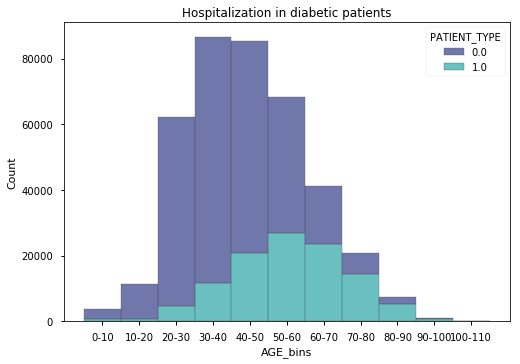

In [130]:
f, ax = plt.subplots()
sns.histplot(df,
    x='AGE_bins', 
    hue="PATIENT_TYPE",
    palette='mako',
    edgecolor=".3",
    multiple="stack",
    binwidth=1
)
ax.set_title('Hospitalization in diabetic patients')
;

Let us look at some percentages to get a clearer sense of the trend in specific age groups:

In [131]:
df.loc[df["AGE_bins"]=='50-60']['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.608165
1.0    0.391835
Name: PATIENT_TYPE, dtype: float64

In [132]:
df.loc[df["AGE_bins"]=='60-70']['PATIENT_TYPE'].value_counts(normalize=True)

1.0    0.574044
0.0    0.425956
Name: PATIENT_TYPE, dtype: float64

In [133]:
df.loc[df["AGE_bins"]=='70-80']['PATIENT_TYPE'].value_counts(normalize=True)

1.0    0.68315
0.0    0.31685
Name: PATIENT_TYPE, dtype: float64

We can see clearly the switch happening: 
- in patients between 50 and 60 the chance of hospitalization is around 40%.
- for patients between 60 and 70 it increases to 57%.
- in patients between 70 and 80 the chance of hospitalization is almost 70%.

In [134]:
df.loc[df["AGE_bins"]=='20-30']['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.92246
1.0    0.07754
Name: PATIENT_TYPE, dtype: float64

To have a comparison, patients between 20 and 30 years old had only an 8% chance to be hospitalized.

In [135]:
df.loc[df["AGE"]==0]['PATIENT_TYPE'].value_counts(normalize=True)

1.0    0.610284
0.0    0.389716
Name: PATIENT_TYPE, dtype: float64

In [136]:
df.loc[df["AGE"]==1]['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.702609
1.0    0.297391
Name: PATIENT_TYPE, dtype: float64

In [137]:
df.loc[df["AGE"]==2]['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.810056
1.0    0.189944
Name: PATIENT_TYPE, dtype: float64

We can observe a different trend with young age, where patients less than 1 year old were 61% likely to be hospitalized, while for 1 year olds the chance is only 30% and for 2 year olds 19%.

In [138]:
print(f'{Fore.BLUE}We can observe two different trends with age. \nIn general an older age brings a higher chance to be hospitalized, since the hospitalization rate for people between 20 and 30 years old was only 8%, while it was almost 60% for people between 60 and 70, and it reached almost 70% for people between 70 and 80.\n For younger kids instead we see that with age increasing the chance of hospitalization decreases, as it goes from   61% for kids younger than 1, to 30% for kids between 1 and 2 and to 18% for kids between 2 and 3. ')

We can observe two different trends with age. 
In general an older age brings a higher chance to be hospitalized, since the hospitalization rate for people between 20 and 30 years old was only 8%, while it was almost 60% for people between 60 and 70, and it reached almost 70% for people between 70 and 80.
 For younger kids instead we see that with age increasing the chance of hospitalization decreases, as it goes from   61% for kids younger than 1, to 30% for kids between 1 and 2 and to 18% for kids between 2 and 3. 


### Diabetes

Calculating the percentage of patients that had diabetes, whether they where hospitalized or not.

In [139]:
df.loc[df["DIABETES"]==1]['PATIENT_TYPE'].value_counts(normalize=True)

1.0    0.559976
0.0    0.440024
Name: PATIENT_TYPE, dtype: float64

Calculating the percentage of patients that did not have diabetes, whether they where hospitalized or not.

In [140]:
df.loc[df["DIABETES"]==0]['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.770055
1.0    0.229945
Name: PATIENT_TYPE, dtype: float64

''

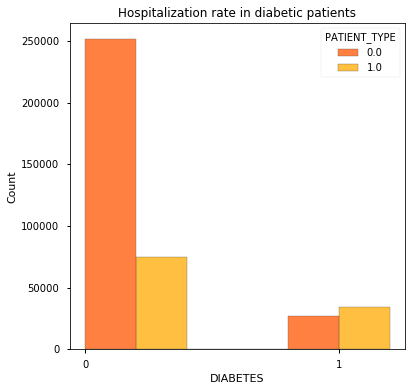

In [141]:
f, ax = plt.subplots(figsize=(6, 6))
sns.histplot(df,
    x='DIABETES', 
    hue="PATIENT_TYPE",
    palette='autumn',
    edgecolor=".3",
    multiple="dodge",
    binwidth=0.4
)
ax.set_xticks([0,1])
ax.set_title('Hospitalization rate in diabetic patients')
;

In [142]:
print(f'{Fore.MAGENTA}Out of the patients that had diabetes: 56% of them needed hospitalization, while for patients without diabetes the    chance of hospitalization was only 23%')

Out of the patients that had diabetes: 56% of them needed hospitalization, while for patients without diabetes the    chance of hospitalization was only 23%


### Hypertension

Let us calculate the percentage of patient with hypertension that were hospitalized.

In [143]:
df.loc[df["HIPERTENSION"]==1]['PATIENT_TYPE'].value_counts(normalize=True)

1.0    0.509645
0.0    0.490355
Name: PATIENT_TYPE, dtype: float64

Calculating the percentage of patient without hypertension that were hospitalized.

In [144]:
df.loc[df["HIPERTENSION"]==0]['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.773146
1.0    0.226854
Name: PATIENT_TYPE, dtype: float64

''

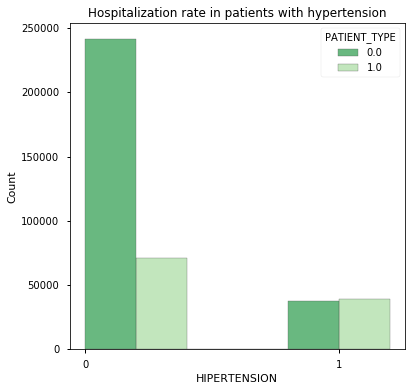

In [145]:
f, ax = plt.subplots(figsize=(6, 6))
sns.histplot(df,
    x='HIPERTENSION', 
    hue="PATIENT_TYPE",
    palette='Greens_r',
    edgecolor=".3",
    multiple="dodge",
    binwidth=0.4
)
ax.set_xticks([0,1])
ax.set_title('Hospitalization rate in patients with hypertension')
;

In [146]:
print(f'{Fore.YELLOW}Looking at hypertension: in the patients suffering hypertension 51% of them needed to be hospitalized, while for the patients with regular blood pressure, the chance of hospitalization was 23%.')

Looking at hypertension: in the patients suffering hypertension 51% of them needed to be hospitalized, while for the patients with regular blood pressure, the chance of hospitalization was 23%.


### Sex

Studying the difference in hospitalization rate based on sex.
<br>For females:

In [147]:
df.loc[df["SEX"]==1]['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.768165
1.0    0.231835
Name: PATIENT_TYPE, dtype: float64

Percentage of hospitalization in males:

In [148]:
df.loc[df["SEX"]==0]['PATIENT_TYPE'].value_counts(normalize=True)

0.0    0.673682
1.0    0.326318
Name: PATIENT_TYPE, dtype: float64

''

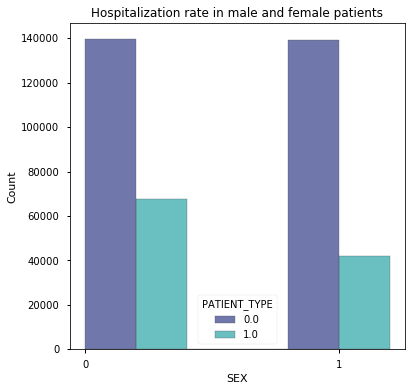

In [149]:
f, ax = plt.subplots(figsize=(6, 6))
sns.histplot(df,
    x='SEX', 
    hue="PATIENT_TYPE",
    palette='mako',
    edgecolor=".3",
    multiple="dodge",
    binwidth=0.4
)
ax.set_xticks([0,1])
ax.set_title('Hospitalization rate in male and female patients')
;

In [150]:
print(f'{Fore.CYAN}Hospitalization based on sex: while only 23% of women needed to be hospitalization, the rate for males was 33%.')

Hospitalization based on sex: while only 23% of women needed to be hospitalization, the rate for males was 33%.


## Recommendations

Based on our model we found that the most relevant factors that determine a patient's risk to be hospitalized are 
age and sex together with suffering from pneumonia, diabetes and hypertension.
<br>We would recommend for the CDC to launch health campaings to start to treat and prevent pneumonia, hypertension and diabetes.
<br>Older people and infants under one year old, together with men turned out to be the groups more at risk. <br>Informing the population of this can help people belonging to these groups stay particularly safe by taking extra precautions.
<br>The CDC should inform healthcare providers of these risk factors so that they could start to specifically treat these conditions and closely follow their high-risk patients.

# Conclusions:

### Best model:
The one that we selected as our best model was the RandomForestClassifier with parameters that we found after our fourth GridSearchCV.
<br>The parameters for this model were:
<br>'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30

Based on our model we could predict the amount of patients that needed to be hospitalized, reaching an F1 score of 76%, a roc auc score of 90% and with a recall of 77%.
<br>We choose this as our best model because, with the other metrics being comparable to the other models, it was the one with the highest recall.
<br>We decided to pay closest attention to recall compared to the other metrics because recall accounts for false negatives, which are very important in our business case.
<br>A false negative would mean that our model identified a patient as not in need to be hospitalized, when actually they were.
A high number of false negatives therefore would mean that the hospital is not prepared to treat all of the patients, having a shortage of personnel and equipment.
<br>Because of this we chose the model with the higest recall, that produced the lowest number of false negatives.

In our specific study, the model identified correctly 83,468 patients and incorrectly 13,751 with an overall accuracy of 86%. <br>The results reported refer to the test set but the values are almost exactly the same also for the train set.
### Features:
Looking at the best models, the features that turned out to be most important in determining the risk factor for patients were pneumonia, age, diabetes, hypertension, and sex.
<br> The most relevant results:
<br> Patients with pneumonia turned out to be 7 times more likely to need hospitalization.
<br> Older people had a higher chance of needing hospitalizations, especially from their 60s on, with the exception of infants under one year old that were also at higher risk for hospitalization.
<br>We had learned this from experience, and could gather this information as the pandemic kept progressing and risk factors became clear.
<br>But the problem is...

We do not know when the next pandemic will hit and how many people will need to be hospitalized and what will be the most important factors that determine a patient to be at risk.
<br>Starting from this model the CDC and local hospitals could become more prepared for the next pandemic.
<br>By simply using some samples of people that got sick with a new virus, and by fitting and running this model we could find out in a timely manner what are the factors that are most important to pay close attention to.
<br>With this model, we could have used the months of January and February back in 2020 to study the first Covid-19 patients and understand what factors to look for and how many people we could expect to need hospitalization.
<br>By applying the same model (fitted for the new disease) to the population of a certain area, we could predict how many people would need to be hospitalized, so a hospital could be prepared in terms of equipment and personnel to be able to treat all the patients in need.

## Next Steps
To further improve our model we could try to work on a broader sample of patients in order to see if other trends would emerge in terms of risk factors.
<br>We could also study more in depth the effect of multiple factors' interaction at play in high-risk patients.
<br>
<br>We could refine the model by population or area, fitting it on different samples of different populations, as different groups of people might suffer from diseases or risk factors based on the climate, local health habits, genetic components as well as socio-economic status.
<br>
<br>With more powerful AI tools we could automate the process of extracting the most important factors and studying them. This would result in the model being more efficiently applied to a new disease and study the risk factors while here that selection had to be done by hand.